In [0]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
from scipy import integrate

In [0]:
def u(x, w, b):
    return x*w + b

In [0]:
def activation(x):
    return np.tanh(x)

In [0]:
def y(u1, u2, w1, w2, b):
    return w1*activation(u1) + w2*activation(u2) + b

In [0]:
def ddfddx(f, x, dx):
    return (f(x+dx) - 2*f(x) + f(x-dx)) / (2*dx)

In [0]:
def dfdx(f, x, dx):
    return (f(x+dx) - f(x-dx)) / (2*dx)

In [0]:
def phi(x, w11, w21, w12, w22, b11, b21, b):
    return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))

In [0]:
def Hphi(x, dx, w11, w21, w12, w22, b11, b21, b):
    def phix(x):
        return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))
    return -ddfddx(phix, x, dx) + x**2


In [0]:
def sampling(phix, sampling_num=10000):
    x0 = np.random.randn()
    sampled_x = [x0]

    for i in range(sampling_num):
        next_x = 10.0 * (np.random.rand() - 0.5)
        # phi_eval = phi(sampled_x[-1], w11, w21, w12, w22, b11, b21, b)
        # phi_eval_next = phi(next_x, w11, w21, w12, w22, b11, b21, b)
        phi_eval = phix(sampled_x[-1])
        phi_eval_next = phix(next_x)
        if np.random.rand() < (phi_eval_next**2 / phi_eval**2):
            sampled_x.append(next_x)
        else:
            sampled_x.append(sampled_x[-1])
    
    return sampled_x

In [0]:
def Hmean(dx, w11, w21, w12, w22, b11, b21, b):
    def phix(x):
        return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))
    def Hphix(x):
        return Hphi(x, dx, w11, w21, w12, w22, b11, b21, b)
    sampled_x = sampling(phix, 20000)
    # denominator = sum([phix(x)**2 for x in sampled_x]) / len(sampled_x)
    # numerator = sum([phix(x)*Hphix(x) for x in sampled_x]) / len(sampled_x)

    # return numerator / denominator
    return sum([Hphix(x) for x in sampled_x]) / len(sampled_x)

    # denominator = integrate.quad(lambda x: phix(x)**2, -5.0, 5.0)[0]
    # numerator = integrate.quad(lambda x: phix(x)*Hphix(x), -5.0, 5.0)[0]

    # return numerator / denominator

In [0]:
DX = 1e-3

In [0]:
w11, w21, w12, w22, b11, b21, b = np.random.randn(7)

In [35]:
w12

0.9096071898416788

In [0]:
xs = np.linspace(-5, 5, 60)

In [0]:
phis = []

for x in xs:
    phis.append(phi(x, w11, w21, w12, w22, b11, b21, b))

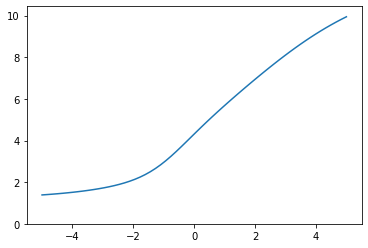

In [38]:
plt.ylim([0, max(phis)+0.5])
plt.plot(xs, phis)

In [39]:
np.random.rand()

0.38747160424185356

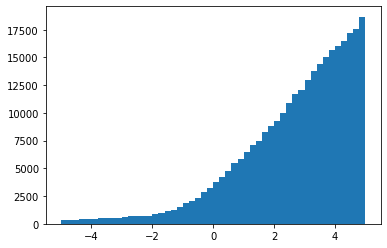

In [40]:
def phix(x):
    return np.exp(y(u(x, w11, b11), u(x, w21, b21), w12, w22, b))

_ = plt.hist(sampling(phix, 300000), bins=50)

In [41]:
Hmean(DX, w11, w21, w12, w22, b11, b21, b)

10.69717368456354

In [0]:
ALPHA = 1e-2

In [0]:
DELTA_PARAM = 1e-2


  0%|          | 0/100 [00:00<?, ?it/s]

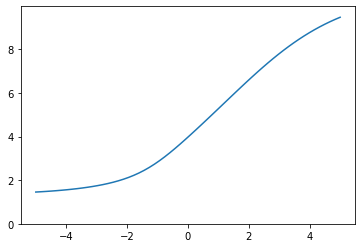


 10%|█         | 10/100 [01:36<14:25,  9.61s/it]

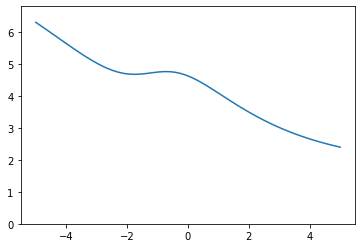


 20%|██        | 20/100 [03:12<12:50,  9.63s/it]

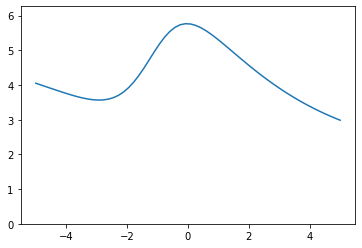


 30%|███       | 30/100 [04:49<11:18,  9.69s/it]

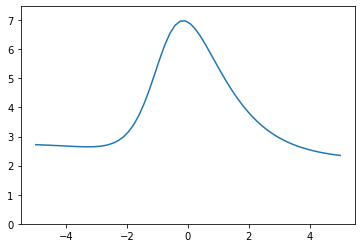


 40%|████      | 40/100 [06:27<09:47,  9.79s/it]

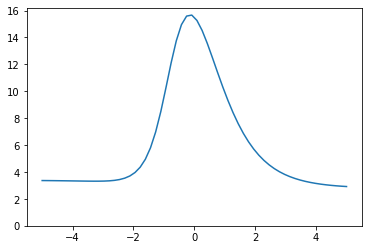


 50%|█████     | 50/100 [08:04<08:05,  9.71s/it]

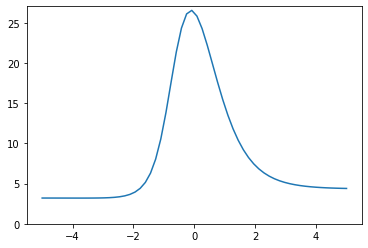


 60%|██████    | 60/100 [09:42<06:28,  9.71s/it]

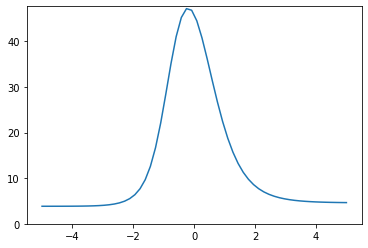


 70%|███████   | 70/100 [11:19<04:51,  9.72s/it]

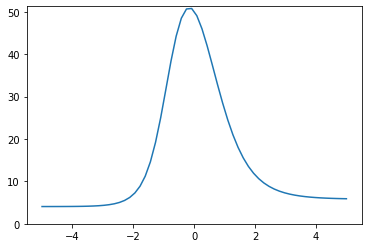


 80%|████████  | 80/100 [12:56<03:13,  9.66s/it]

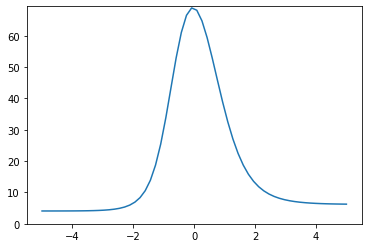


 90%|█████████ | 90/100 [14:32<01:36,  9.65s/it]

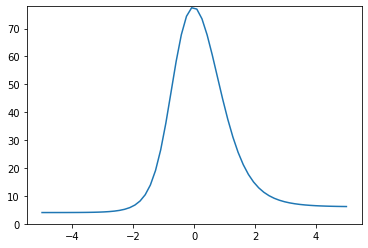


100%|██████████| 100/100 [16:09<00:00,  9.68s/it]


In [44]:
N_TRAIN = 100

Hmeans = []

for i in tqdm(range(N_TRAIN)):
    dw11 = (Hmean(DX, w11+DELTA_PARAM, w21, w12, w22, b11, b21, b) - Hmean(DX, w11-DELTA_PARAM, w21, w12, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw21 = (Hmean(DX, w11, w21+DELTA_PARAM, w12, w22, b11, b21, b) - Hmean(DX, w11, w21-DELTA_PARAM, w12, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw12 = (Hmean(DX, w11, w21, w12+DELTA_PARAM, w22, b11, b21, b) - Hmean(DX, w11, w21, w12-DELTA_PARAM, w22, b11, b21, b)) / (2*DELTA_PARAM)
    dw22 = (Hmean(DX, w11, w21, w12, w22+DELTA_PARAM, b11, b21, b) - Hmean(DX, w11, w21, w12, w22-DELTA_PARAM, b11, b21, b)) / (2*DELTA_PARAM)
    db11 = (Hmean(DX, w11, w21, w12, w22, b11+DELTA_PARAM, b21, b) - Hmean(DX, w11, w21, w12, w22, b11-DELTA_PARAM, b21, b)) / (2*DELTA_PARAM)
    db21 = (Hmean(DX, w11, w21, w12, w22, b11, b21+DELTA_PARAM, b) - Hmean(DX, w11, w21, w12, w22, b11, b21-DELTA_PARAM, b)) / (2*DELTA_PARAM)
    db = (Hmean(DX, w11, w21, w12, w22, b11, b21, b+DELTA_PARAM) - Hmean(DX, w11, w21, w12, w22, b11, b21, b-DELTA_PARAM)) / (2*DELTA_PARAM)

    Hmeans.append(Hmean(DX, w11, w21, w12, w22, b11, b21, b))

    w11 -= ALPHA * dw11
    w21 -= ALPHA * dw21
    w12 -= ALPHA * dw12
    w22 -= ALPHA * dw22
    b11 -= ALPHA * db11
    b21 -= ALPHA * db21
    b -= ALPHA * db

    if i % 10 == 0:
        phis = []

        for x in xs:
            phis.append(phi(x, w11, w21, w12, w22, b11, b21, b))

        plt.ylim([0, max(phis)+0.5])
        plt.plot(xs, phis)
        plt.show()

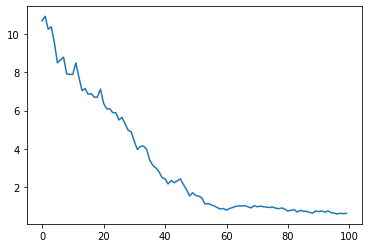

In [45]:
plt.plot(Hmeans)